In [370]:
import pandas as pd
from env import get_connection
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire
#import my own prepare module
import prepare


In [371]:
def prep_titanic(df):
    '''This function takes in the titanic df specifically and drops the 
    listed columns and creates dummy variables for the selected columns'''
    
    drop_cols = ['Unnamed: 0', 'passenger_id', 'embarked', 'class', 'deck']
    
    df.drop(columns = drop_cols, inplace = True)
    
    dummies = pd.get_dummies(df[['sex', 'embark_town']], drop_first = True)

    df = pd.concat([df, dummies], axis = 1)
    
    return df


In [372]:
df = acquire.get_titanic_data()

In [373]:
df = prep_titanic(df)

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   sex                      891 non-null    object 
 3   age                      714 non-null    float64
 4   sibsp                    891 non-null    int64  
 5   parch                    891 non-null    int64  
 6   fare                     891 non-null    float64
 7   embark_town              889 non-null    object 
 8   alone                    891 non-null    int64  
 9   sex_male                 891 non-null    uint8  
 10  embark_town_Queenstown   891 non-null    uint8  
 11  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(3)
memory usage: 65.4+ KB


In [337]:
def train_val_test(df, target, seed=42):
    '''This function splits the data by taking in a data frame and splits it into 3 sections; train, validate and test
    so you can run your data through an algorithm to test it for acuracy'''
    
    train, val_test = train_test_split(df, train_size=0.7, random_state=seed, stratify=df[target])
    
    val, test = train_test_split(val_test, train_size=0.5, random_state=seed, stratify=val_test[target])
    
    return train, val, test

In [338]:
df.drop(columns = ['embark_town', 'fare'], inplace = True)

In [339]:
df['sex'] = np.where(df['sex'] == True, 'True', 'False')

In [340]:
df.drop(columns = 'age', inplace = True)

In [341]:
df.drop(columns = 'sex', inplace = True)

In [342]:
df.drop(columns = ['embark_town_Queenstown', 'embark_town_Southampton'], inplace = True)

In [343]:
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   survived  891 non-null    int64
 1   pclass    891 non-null    int64
 2   sibsp     891 non-null    int64
 3   parch     891 non-null    int64
 4   alone     891 non-null    int64
 5   sex_male  891 non-null    int64
dtypes: int64(6)
memory usage: 41.9 KB


In [344]:
train, val, test = train_val_test(df, 'survived')

train.shape, val.shape, test.shape

((623, 6), (134, 6), (134, 6))

In [345]:
X_train = train.drop(columns = ['survived'])
y_train = train['survived']

X_val = val.drop(columns = ['survived'])
y_val = val['survived']

X_test = test.drop(columns = ['survived'])
y_test = test['survived']

In [346]:
seed = 42
#Creating a framework for your data to be run in
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

In [347]:
#fitting and selecting the data that will be run through your framework you created above
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [348]:
#testing the accuracy of your train data without the visualization
clf.score(X_train, y_train)

0.8170144462279294

In [349]:
#testing the accuracy of your validate data without the visualization

clf.score(X_val, y_val)

0.8134328358208955

In [350]:
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 748 to 136
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pclass    623 non-null    int64
 1   sibsp     623 non-null    int64
 2   parch     623 non-null    int64
 3   alone     623 non-null    int64
 4   sex_male  623 non-null    int64
dtypes: int64(5)
memory usage: 29.2 KB


,pclass,sibsp,parch,alone,sex_male
748,1,1,0,0,1
45,3,0,0,1,1
28,3,0,0,1,0
633,1,0,0,1,1
403,3,1,0,0,1


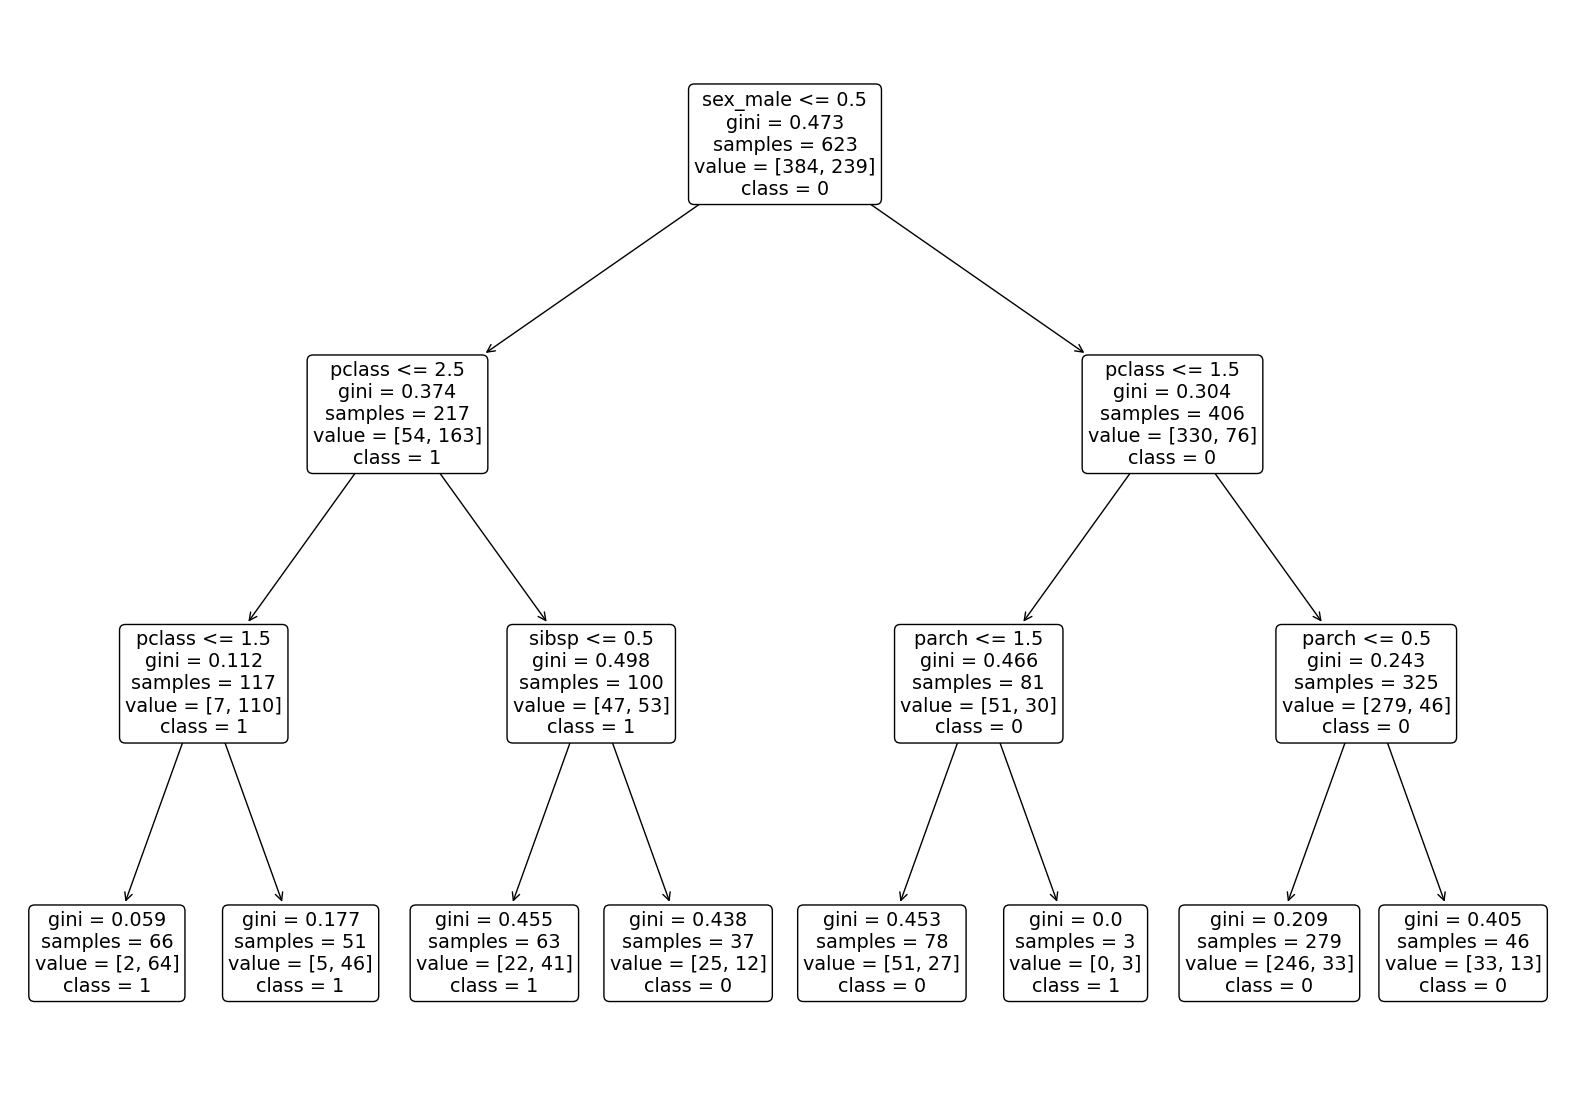

In [351]:
plt.figure(figsize=(20,14))
#creating the visualization of the train data
plot_tree(clf, feature_names=X_train.columns, class_names = np.array(clf.classes_).astype('str').tolist(), rounded=True)
plt.show()

In [352]:
#creating a variable for your validation predictions
val_preds = clf.predict(X_val)

In [353]:
print(classification_report(y_val, val_preds))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        82
           1       0.86      0.62      0.72        52

    accuracy                           0.81       134
   macro avg       0.83      0.78      0.79       134
weighted avg       0.82      0.81      0.81       134



In [354]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 1, 0, 0])

In [355]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.65384615, 0.34615385],
       [0.88172043, 0.11827957],
       [0.34920635, 0.65079365],
       [0.65384615, 0.34615385],
       [0.88172043, 0.11827957]])

In [356]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.82


In [357]:
confusion_matrix(y_train, y_pred)

array([[355,  29],
       [ 85, 154]])

In [358]:
y_train.value_counts()

0    384
1    239
Name: survived, dtype: int64

In [359]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,355,29
1,85,154


In [360]:
tp = 356
tn = 166
fp = 28
fn = 73

In [361]:
accuracy = (tp + tn) / (fp+tp+fn+tn)
print(accuracy)
precision = tp / (tp+fp)
print(precision)
recall = tp / (tp+fn)
print(recall)

0.8378812199036918
0.9270833333333334
0.8298368298368298


In [362]:
print("True positive rate is:", 356/623)
print("True negative rate is:", 166/623)
print("False positive rate is:", 28/623)
print("False Negative rate is:", 73/623)


True positive rate is: 0.5714285714285714
True negative rate is: 0.2664526484751204
False positive rate is: 0.0449438202247191
False Negative rate is: 0.11717495987158909


In [363]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_val, y_val)))

Accuracy of Decision Tree classifier on validate set: 0.81


In [364]:
for i in range(1, 21):
    trees = DecisionTreeClassifier(max_depth= i, random_state = 42)
    trees = trees.fit(X_train, y_train)
    y_preds = trees.predict(X_train)
    report = classification_report(y_train, y_preds, output_dict = True)
    print('Tree with a max depth of', i)
    print(pd.DataFrame(report))

Tree with a max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.812808    0.751152  0.791332    0.781980      0.789155
recall       0.859375    0.682008  0.791332    0.770692      0.791332
f1-score     0.835443    0.714912  0.791332    0.775178      0.789204
support    384.000000  239.000000  0.791332  623.000000    623.000000
Tree with a max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.812808    0.751152  0.791332    0.781980      0.789155
recall       0.859375    0.682008  0.791332    0.770692      0.791332
f1-score     0.835443    0.714912  0.791332    0.775178      0.789204
support    384.000000  239.000000  0.791332  623.000000    623.000000
Tree with a max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.806818    0.841530  0.817014    0.824174      0.820135
recall       0.924479    0.644351  0.817014    0.784415      0.817014
f1-score 

In [367]:
metrics = []

for i in range(1, 25):
    tree = DecisionTreeClassifier(max_depth= i, random_state = 42)
    tree = trees.fit(X_train, y_train)
    in_sample_accuracy = trees.score(X_train, y_train)
    out_of_sample_accuracy = tree.score(X_val, y_val)
    output = {'max_depth': i, 'train_accuracy': in_sample_accuracy, 'validate_accuracy': out_of_sample_accuracy}
    
    metrics.append(output)

df = pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.791332,0.813433,-0.022101
1,2,0.791332,0.813433,-0.022101
2,3,0.791332,0.813433,-0.022101
3,4,0.791332,0.813433,-0.022101
4,5,0.791332,0.813433,-0.022101
5,6,0.791332,0.813433,-0.022101
6,7,0.791332,0.813433,-0.022101
7,8,0.791332,0.813433,-0.022101
8,9,0.791332,0.813433,-0.022101
9,10,0.791332,0.813433,-0.022101


# Depth 10 model

In [250]:
seed = 42

clf = DecisionTreeClassifier(max_depth = 10, random_state = 42)

In [251]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [252]:
clf.score(X_train, y_train)

0.8378812199036918

In [253]:
clf.score(X_val, y_val)

0.8134328358208955

In [254]:
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 748 to 136
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pclass    623 non-null    int64
 1   sibsp     623 non-null    int64
 2   parch     623 non-null    int64
 3   alone     623 non-null    int64
 4   sex_male  623 non-null    int64
dtypes: int64(5)
memory usage: 29.2 KB


,pclass,sibsp,parch,alone,sex_male
748,1,1,0,0,1
45,3,0,0,1,1
28,3,0,0,1,0
633,1,0,0,1,1
403,3,1,0,0,1


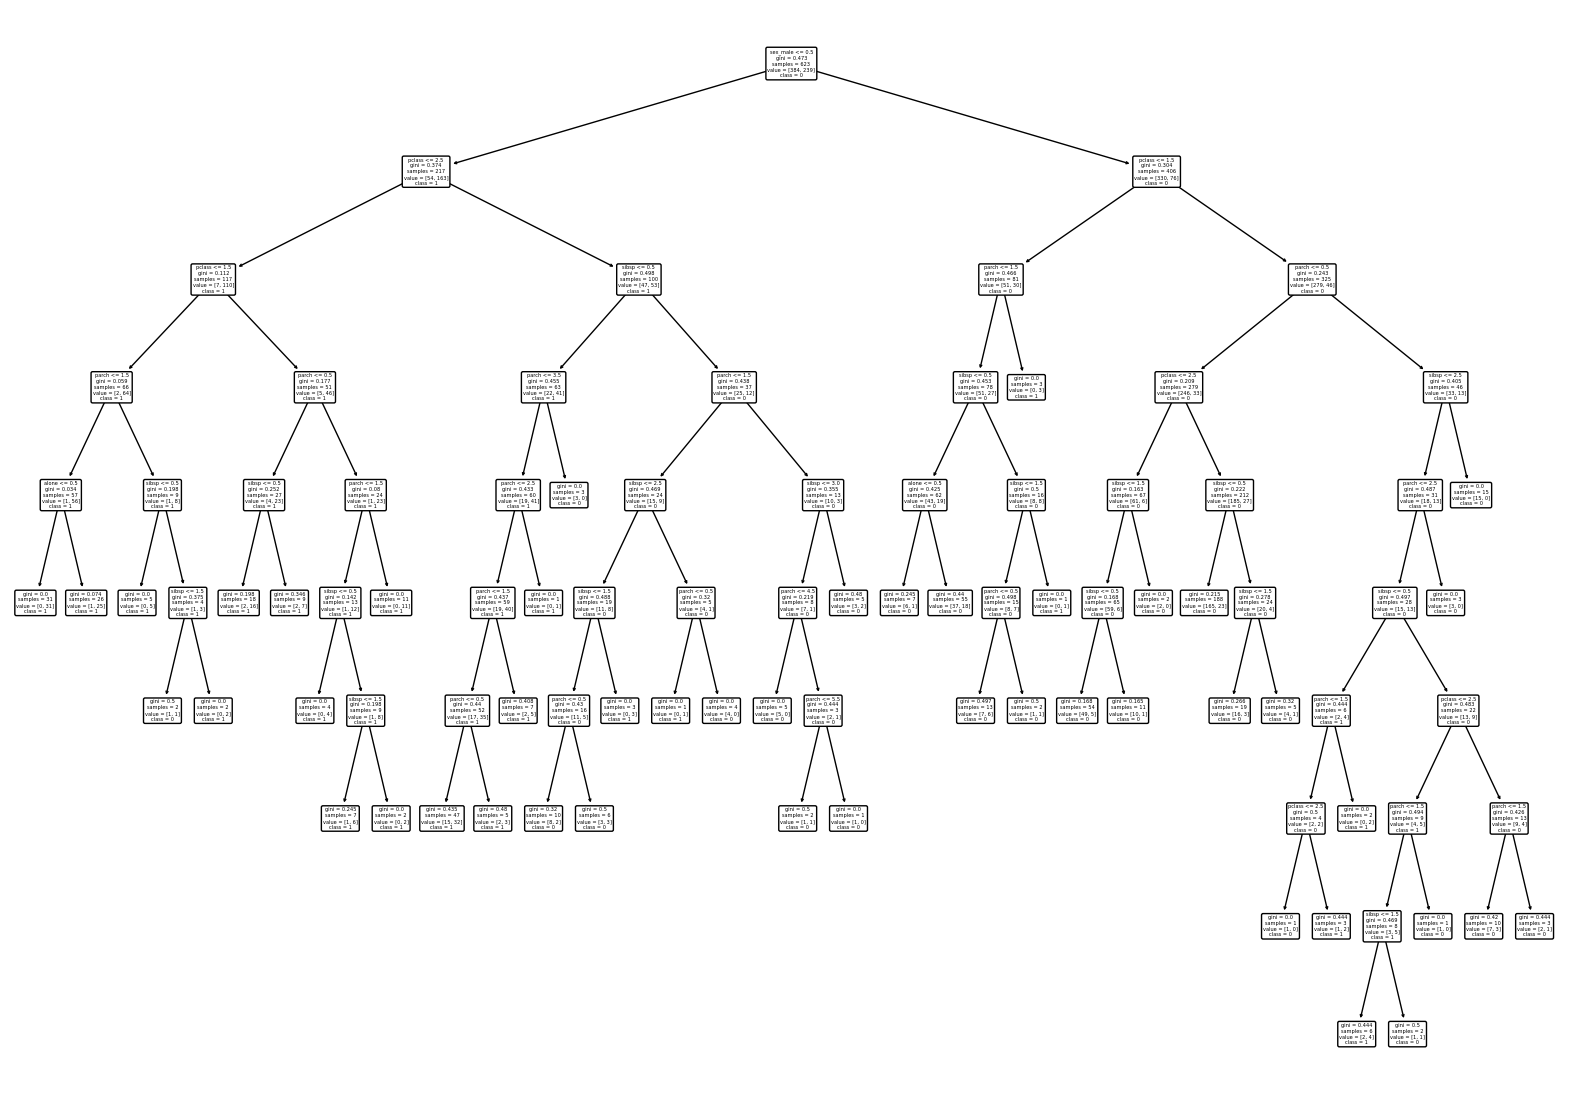

In [255]:
plt.figure(figsize=(20,14))

plot_tree(clf, feature_names=X_train.columns, class_names = np.array(clf.classes_).astype('str').tolist(), rounded=True)
plt.show()

In [256]:
val_preds = clf.predict(X_val)

In [257]:
print(classification_report(y_val, val_preds))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86        82
           1       0.81      0.67      0.74        52

    accuracy                           0.81       134
   macro avg       0.81      0.79      0.80       134
weighted avg       0.81      0.81      0.81       134



In [258]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 1, 0, 0])

In [259]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.53846154, 0.46153846],
       [0.87765957, 0.12234043],
       [0.31914894, 0.68085106],
       [0.67272727, 0.32727273],
       [0.84210526, 0.15789474]])

In [260]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.84


In [261]:
confusion_matrix(y_train, y_pred)

array([[356,  28],
       [ 73, 166]])

In [262]:
y_train.value_counts()

0    384
1    239
Name: survived, dtype: int64

In [263]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,356,28
1,73,166


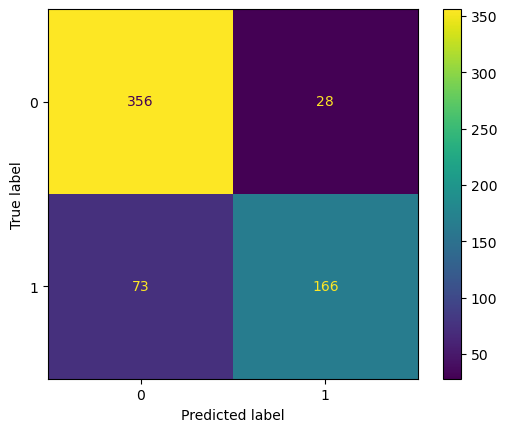

In [321]:
plot_confusion_matrix(clf, X_train, y_train)

In [264]:
tp = 356
tn = 166
fp = 28
fn = 73

In [265]:
accuracy = (tp + tn) / (fp+tp+fn+tn)
print(accuracy)
precision = tp / (tp+fp)
print(precision)
recall = tp / (tp+fn)
print(recall)

0.8378812199036918
0.9270833333333334
0.8298368298368298


In [266]:
print("True positive rate is:", 356/623)
print("True negative rate is:", 166/623)
print("False positive rate is:", 28/623)
print("False Negative rate is:", 73/623)


True positive rate is: 0.5714285714285714
True negative rate is: 0.2664526484751204
False positive rate is: 0.0449438202247191
False Negative rate is: 0.11717495987158909


In [267]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_val, y_val)))

Accuracy of Decision Tree classifier on validate set: 0.81


In [268]:
y_pred = clf.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86        82
           1       0.81      0.67      0.74        52

    accuracy                           0.81       134
   macro avg       0.81      0.79      0.80       134
weighted avg       0.81      0.81      0.81       134



# Comparison

- Depth 3 model:

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        82
           1       0.86      0.62      0.72        52

    accuracy                           0.81       134
   macro avg       0.83      0.78      0.79       134
weighted avg       0.82      0.81      0.81       134


- Depth 10 model:

              precision    recall  f1-score   support

           0       0.81      0.90      0.86        82
           1       0.81      0.67      0.74        52

-     accuracy                           0.81       134
-    macro avg       0.81      0.79      0.80       134
- weighted avg       0.81      0.81      0.81       134

There doesn't seem to be a SIGNIFICANT difference in the models, where one performed better, the other performed better elsewhere. Precision and recall is a good example of this

- the 10 depth model work better by 2 percent on the in-sample(train)
- the result on validate worked the same at 81%


# TELCO DATASET *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [283]:
def prep_telco(df):
    useless_cols = ['Unnamed: 0', 'customer_id', 'internet_service_type', 'streaming_tv', 'streaming_movies',
                'contract_type', 'payment_type', 'paperless_billing', 'device_protection']
    df.drop(columns = useless_cols, inplace = True)
    
    dummies = pd.get_dummies(df[['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'churn',
                                  'online_security', 'online_backup', 'tech_support']], drop_first = True)

    df = pd.concat([df, dummies], axis = 1)
    
    return df
    

In [309]:
telco_df = acquire.get_telco_data()

In [310]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   internet_service_type_id  7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

In [311]:
telco_df = prep_telco(telco_df)


In [316]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   payment_type_id                      7043 non-null   int64  
 1   contract_type_id                     7043 non-null   int64  
 2   internet_service_type_id             7043 non-null   int64  
 3   senior_citizen                       7043 non-null   int64  
 4   tenure                               7043 non-null   int64  
 5   monthly_charges                      7043 non-null   float64
 6   total_charges                        7043 non-null   object 
 7   gender_Male                          7043 non-null   uint8  
 8   partner_Yes                          7043 non-null   uint8  
 9   dependents_Yes                       7043 non-null   uint8  
 10  phone_service_Yes                    7043 non-null   uint8  
 11  multiple_lines_No phone servic

In [313]:
telco_df.drop(columns = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'churn', 
                      'online_security', 'online_backup', 'tech_support'], inplace = True)

In [317]:
telco_df.head()

,payment_type_id,contract_type_id,internet_service_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,churn_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,tech_support_No internet service,tech_support_Yes
0,2,2,1,0,9,65.6,593.3,0,1,1,1,0,0,0,0,0,0,1,0,1
1,2,1,1,0,9,59.9,542.4,1,0,0,1,0,1,0,0,0,0,0,0,0
2,1,1,2,0,4,73.9,280.85,1,0,0,1,0,0,1,0,0,0,0,0,0
3,1,1,2,1,13,98.0,1237.85,1,1,0,1,0,0,1,0,0,0,1,0,0
4,2,1,2,1,3,83.9,267.4,0,1,0,1,0,0,1,0,0,0,0,0,1


In [327]:
telco_df.total_charges = telco_df['total_charges'].str.replace(' ', '')

In [329]:
telco_df.total_charges = telco_df.total_charges.astype('float')

ValueError: could not convert string to float: ''